# Interpretable Machine Learning with LIME - Tabular Data - Part 3 Random Forest and LIME

In this series of notebooks, we will fit a statistical (GLM) and a machine learning (RF) model to the Cleveland Heart Diseases data. Then, we will demonstrate using LIME (local interpretable model-agnostic explanations) to provide an easy for human to interpret explanation for the predictions. The goal here is to explore how LIME can provide a simple to interpret explanation for complex (normally human uninterpretable data) models.

Part 3 will be building a random forest model and using LIME to explain the model.

### Load the libraries and the saved data

In [1]:
#Load libraries
library(tidyverse)
library(caret)
library(e1071)
library(ranger)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
load("heart_data.RData")

### Build a RF model through the caret package so the input and output is standardized for LIME.
A random forest model is an ensemble learning method. A number of decisions trees (hence forest) are "averaged" together to generate the classification. This is clearly no longer interpretable to any humans. Without some type of interpretable machine learning, this is a complete black box. This also applies to boosting algorithms and neural networks, two other popular machine learning algorithms.

For this model, the accuracy for the training data is 0.98. The accuracy for the test data is 0.90. We are definitely getting some overfitting (since the number of trees and number of variables is starting to catch up to our number of samples). Those of us coming from statisical backgrounds would also point out that complex machine learning is overfitting restrained by huge amounts of data.

Note that despite all the hoopla, the forest is only ~4% better than the tree. And you should be less confident that it will perform equally well in the wild. Again, complex models are not always better in real life.

In [3]:
set.seed(123)
rf_fit <- train(as.factor(AHD) ~ ., 
                data = datTrain, 
                method = "rf",
                trControl=trainControl(method='repeatedcv', number=10, repeats=3))

In [4]:
rf_fit

Random Forest 

238 samples
 13 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 214, 214, 214, 214, 214, 215, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7827899  0.5625000
  11    0.7522947  0.5008946
  20    0.7438406  0.4839846

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [5]:
predict_datTrain <- predict(rf_fit, subset(datTrain, select = -c(AHD)))
confusionMatrix(predict_datTrain, datTrain$AHD)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  127   3
       Yes   1 107
                                          
               Accuracy : 0.9832          
                 95% CI : (0.9575, 0.9954)
    No Information Rate : 0.5378          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9661          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9922          
            Specificity : 0.9727          
         Pos Pred Value : 0.9769          
         Neg Pred Value : 0.9907          
             Prevalence : 0.5378          
         Detection Rate : 0.5336          
   Detection Prevalence : 0.5462          
      Balanced Accuracy : 0.9825          
                                          
       'Positive' Class : No              
                              

In [6]:
predict_datTest <- predict(rf_fit, subset(datTest, select = -c(AHD)))
confusionMatrix(predict_datTest, datTest$AHD)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  28   2
       Yes  4  25
                                          
               Accuracy : 0.8983          
                 95% CI : (0.7917, 0.9618)
    No Information Rate : 0.5424          
    P-Value [Acc > NIR] : 3.929e-09       
                                          
                  Kappa : 0.7963          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.8750          
            Specificity : 0.9259          
         Pos Pred Value : 0.9333          
         Neg Pred Value : 0.8621          
             Prevalence : 0.5424          
         Detection Rate : 0.4746          
   Detection Prevalence : 0.5085          
      Balanced Accuracy : 0.9005          
                                          
       'Positive' Class : No              
                                 

### Explore Features of LIME for tabular data
We use the same prediction/results outcome split to get an idea of how this model works.

We use plot_explanations function to get an overview of the importances of the features (and derive insight on the overall model). 

More variables are contributing to the outcome allowing for the great accuracy.

In [7]:
library(lime)


Attaching package: ‘lime’

The following object is masked from ‘package:dplyr’:

    explain



In [8]:
expln <- lime(datTest, model = rf_fit)

In [9]:
explanation <- explain(datTrain, expln, n_labels = 1, n_features = 4, feature_select = "highest_weights")

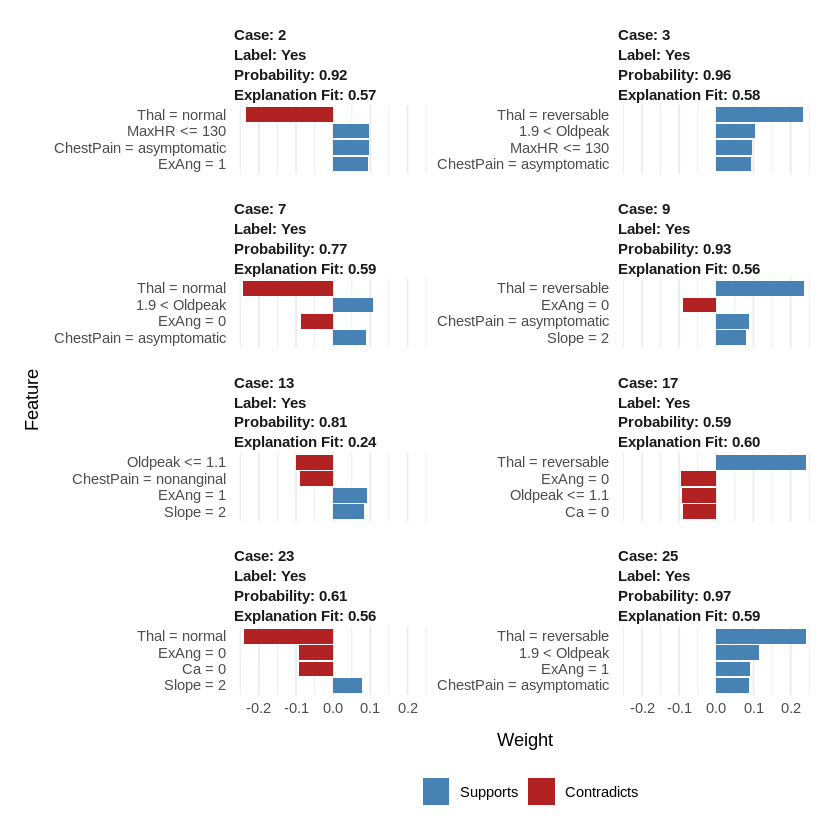

In [10]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "Yes") & (predict_datTrain == "Yes"))[1:8],]))

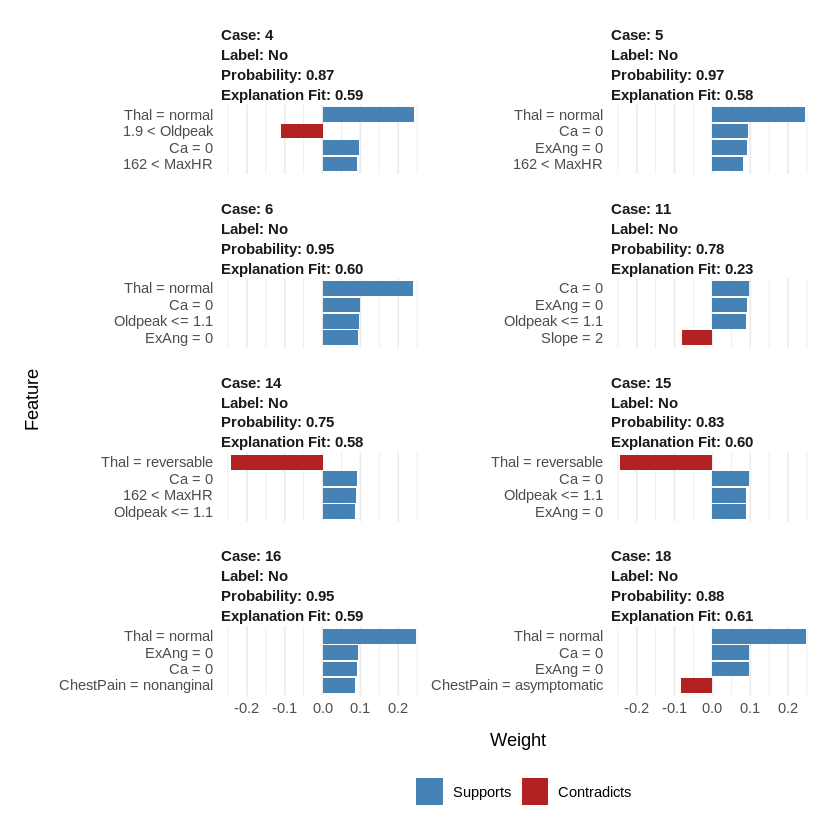

In [11]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "No") & (predict_datTrain == "No"))[1:8],]))

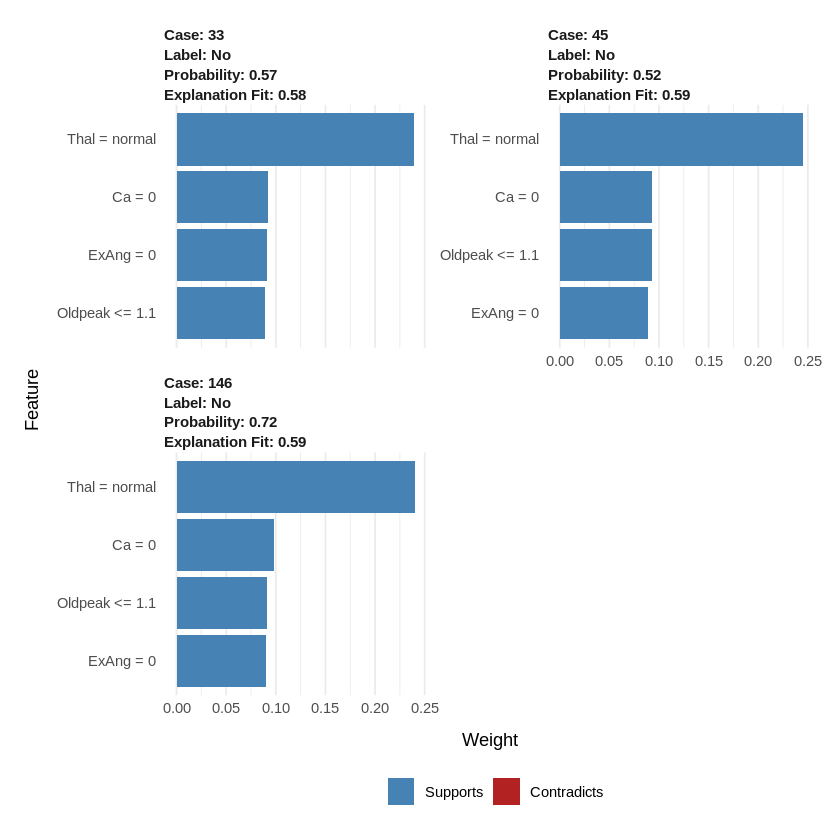

In [12]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "Yes") & (predict_datTrain == "No"))[1:8],]))

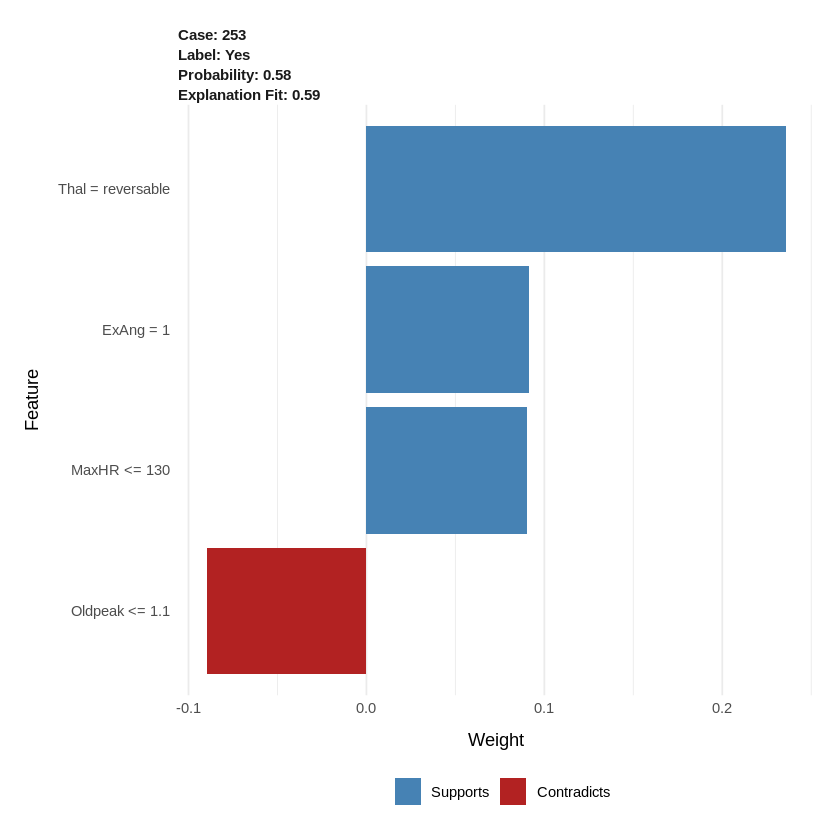

In [13]:
plot_features(explanation, ncol = 2, row.names(datTrain[which((datTrain$AHD == "No") & (predict_datTrain == "Yes"))[1:8],]))

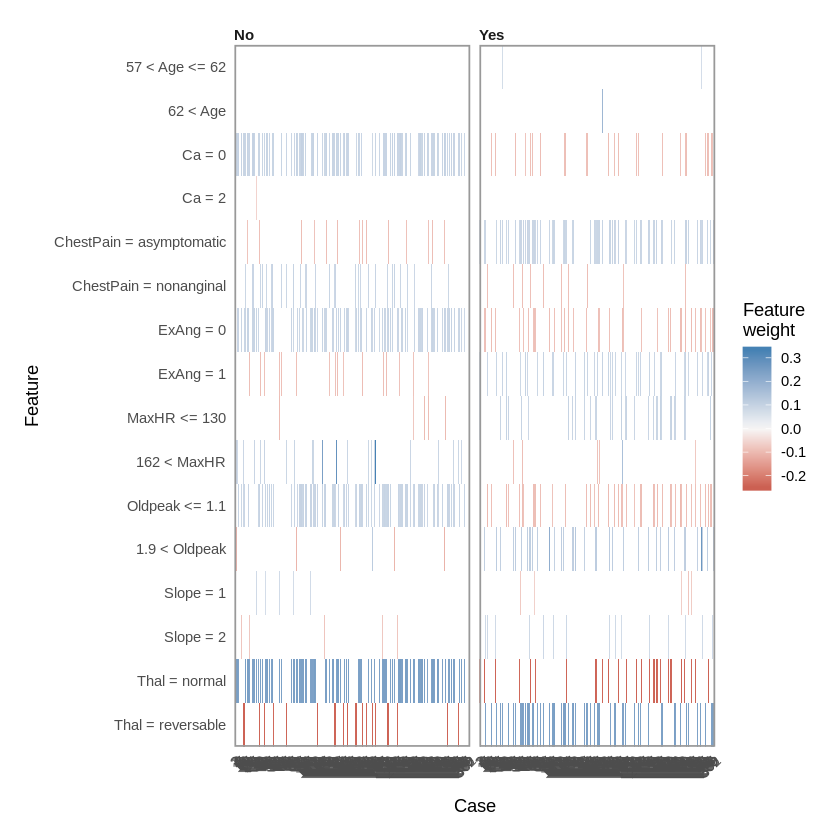

In [14]:
plot_explanations(explanation)